In [1]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
import statsmodels.formula.api as smf    # for OLS regression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Example. Income vs Education in NYC zip code areas

Model population's cumulative income against the number of individuals of different education level within the area. Higher percentage of people with higher education levels is expected to increase an average individual earning prospects

### Memo:
* **IncomePerCapita**----measured in USD
* **rest of the columns**----population number under each category, e.g.
    * total population over 25 years old
    * holding a Bachelor's, Master's, Doctorate degree
    * graduating from high school, professional school, etc.
    * having less than high school, some incomplete college etc

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/IncomeEduReg.csv')
data.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


We will be looking to model the total income of the zip code as
$$
TotalIncome=\sum_i w_i Population_i
$$
where $Population_i$ is the number of people with certain education and the weight coefficient $w_i$ could be interpreted as the average income per capita within this population group. No intercept as we do not expect zero population to have nonzero income

In [3]:
data.dropna(inplace = True)  #drop rows with NANs

In [4]:
data['Income'] = data['IncomePerCapita'] * data['PopOver25'] #calculate total income of the population over 25

In [5]:
#first run a regression again total topulation to define the overall average income per capita
lm2 = smf.ols(formula = 'Income ~ PopOver25-1', data = data).fit()
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              347.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    7.54e-44
Time:                        13:15:31   Log-Likelihood:                         -3976.7
No. Observations:                 181   AIC:                                      7955.
Df Residuals:                     180   BIC:                                      7959.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

And now run the regression for all the education categories

In [6]:
#use this operator to generate the regression formulae
' + '.join(data.columns[3:10])

'LessThanHS + HighSchool + SomeCollege + Bachelor + Master + Doctorate + ProfSchool'

In [7]:
lm2 = smf.ols(formula = 'Income ~ ' + ' + '.join(data.columns[3:10])+'-1', data = data).fit()
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              840.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                   1.50e-130
Time:                        13:15:31   Log-Likelihood:                         -3752.6
No. Observations:                 181   AIC:                                      7519.
Df Residuals:                     174   BIC:                                      7542.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Only two regressors seem significant according to p-value. Also the confidence intervals are pretty broad not allowing to reliably assess the income per capita for each category of residents. This is likely because of the strong internal correlations between the regressors, especially among Bachelor,Master,Doctor and Prof.School

In [8]:
data.corr()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Income
Zipcode,1.000000,-0.490675,0.089223,0.138386,0.298570,0.233799,-0.136994,-0.224106,-0.361479,-0.340607,-0.326244
IncomePerCapita,-0.490675,1.000000,-0.286507,-0.530034,-0.559255,-0.500068,0.262061,0.385013,0.447516,0.571962,0.542535
PopOver25,0.089223,-0.286507,1.000000,0.747408,0.833786,0.876240,0.691929,0.516295,0.350869,0.313306,0.470183
LessThanHS,0.138386,-0.530034,0.747408,1.000000,0.779932,0.693017,0.146826,-0.056804,-0.116706,-0.189604,-0.061991
HighSchool,0.298570,-0.559255,0.833786,0.779932,1.000000,0.918826,0.244020,0.028185,-0.135187,-0.187038,0.005785
SomeCollege,0.233799,-0.500068,0.876240,0.693017,0.918826,1.000000,0.389975,0.200074,0.014369,-0.042483,0.146218
Bachelor,-0.136994,0.262061,0.691929,0.146826,0.244020,0.389975,1.000000,0.919023,0.769090,0.810396,0.873868
Master,-0.224106,0.385013,0.516295,-0.056804,0.028185,0.200074,0.919023,1.000000,0.904758,0.913308,0.912174
Doctorate,-0.361479,0.447516,0.350869,-0.116706,-0.135187,0.014369,0.769090,0.904758,1.000000,0.889662,0.839830
ProfSchool,-0.340607,0.571962,0.313306,-0.189604,-0.187038,-0.042483,0.810396,0.913308,0.889662,1.000000,0.943770


## Homework

Q1. Implement a linear regression of the total income vs population counts with Bachelor, "Advanced" (Advanced = Master + Doctorate + ProfSchool) and "Other" education incorporating all less than Bachelor (some college, high school, less than high school). 

Are all of those regressors statistically signifiant with respect to p-value<5\% criteria? Which of the groups has the highest income per capita according to the slope coefficients with respect to their confidence intervals?

In [9]:
data['Advanced']=data['Master']+data['Doctorate']+data['ProfSchool']
data['Other']=data['SomeCollege']+data['HighSchool']+data['LessThanHS']
data

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Income,Advanced,Other
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207,1.265616e+09,5138,5129
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149,1.639375e+09,5791,42420
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679,3.257002e+09,14399,8825
3,10004,98020.0,2279,29,87,305,984,550,86,238,2.233876e+08,874,421
4,10005,99633.0,5954,133,103,454,2745,1637,219,663,5.932149e+08,2519,690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,11691,19097.0,37582,11290,10248,8695,4598,2018,305,428,7.177035e+08,2751,30233
202,11692,21118.0,11217,2852,2867,3316,1369,534,10,269,2.368806e+08,813,9035
203,11693,25732.0,7560,1304,2353,2033,1390,323,74,83,1.945339e+08,480,5690
204,11694,37351.0,15407,1812,3238,4383,3154,1977,154,689,5.754669e+08,2820,9433


In [10]:
lm1 = smf.ols(formula = 'Income~Bachelor+Advanced+Other-1', data = data).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1106.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                   8.50e-115
Time:                        13:15:31   Log-Likelihood:                         -3804.4
No. Observations:                 181   AIC:                                      7615.
Df Residuals:                     178   BIC:                                      7624.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Bachelor and Advanced seem significant according to p-value. The advanced group has the highest income per capita according to the slope coefficients with respect to their confidence intervals.


Q2. Visualize the regression fit by plotting the observation versus our prediction for the income per zip code as a scatter plot

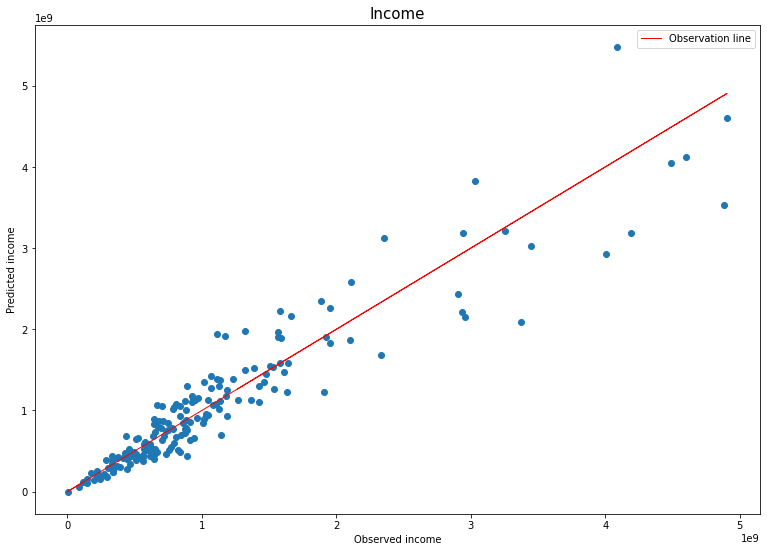

In [14]:
#plotting the observation versus our prediction for the income per zip code as a scatter plot
plt.figure(figsize=(13,9))
plt.plot(data['Income'], lm1.predict(), 'o')
plt.title('Income', fontsize = 15)
plt.xlabel('Observed income')
plt.ylabel('Predicted income')
plt.plot(data['Income'], data['Income'], '-r',label='Observation line',linewidth=1)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


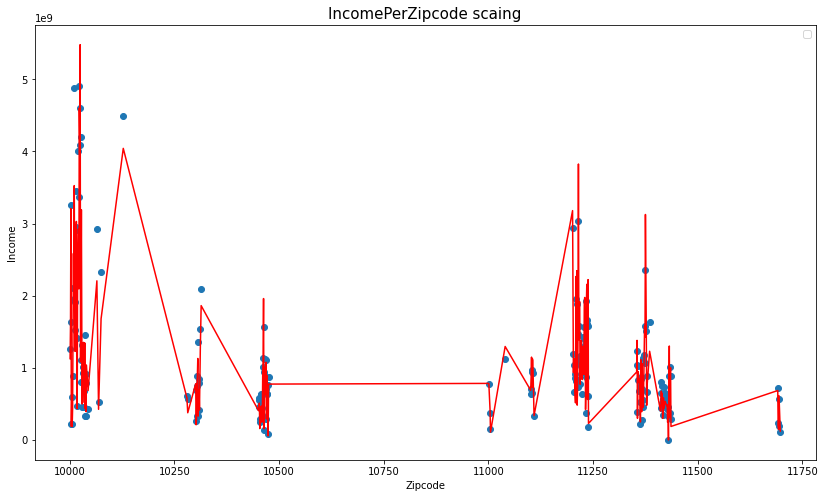

In [15]:
#Income_predict=lm1.predict(data[['Bachelor','Advanced','Other']])
#Visualize the income scaling law
plt.figure(figsize=(14,8))
plt.plot(data['Zipcode'], data['Income'], 'o')
plt.title('IncomePerZipcode scaing', fontsize = 15)
plt.xlabel('Zipcode')
plt.ylabel('Income')
plt.plot(data['Zipcode'], lm1.predict(), '-r')
plt.legend()